In [1]:
import sys
import os
sys.path.append('/home/563/slf563/code/jk72/functions/')
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from functions import * 
from datetime import datetime
import xarray as xr

In [2]:
fdir = '/g/data/jk72/slf563/UM_reg/output/MIP/'

In [3]:
control = xr.open_dataset(fdir+'control_met_at_surface_Davis.nc').assign_coords({'run':'Control'})
V21 = xr.open_dataset(fdir+'V21_met_at_surface_Davis.nc').assign_coords({'run':'V21'})
met = xr.concat([control,V21],dim='run')
del(control,V21)


control = xr.open_dataset(fdir+'control_mass+number_maxing_ratios_with_height_Davis.nc').assign_coords({'run':'Control'})
V21 = xr.open_dataset(fdir+'V21_mass+number_maxing_ratios_with_height_Davis.nc').assign_coords({'run':'V21'})
mmrs = xr.concat([control,V21],dim='run')
del(control,V21)

control = xr.open_dataset(fdir+'control_met_with_height_Davis.nc').assign_coords({'run':'Control'})
V21 = xr.open_dataset(fdir+'V21_met_with_height_Davis.nc').assign_coords({'run':'V21'})
met_w_h = xr.concat([control,V21],dim='run')
del(control,V21)

0.3.0


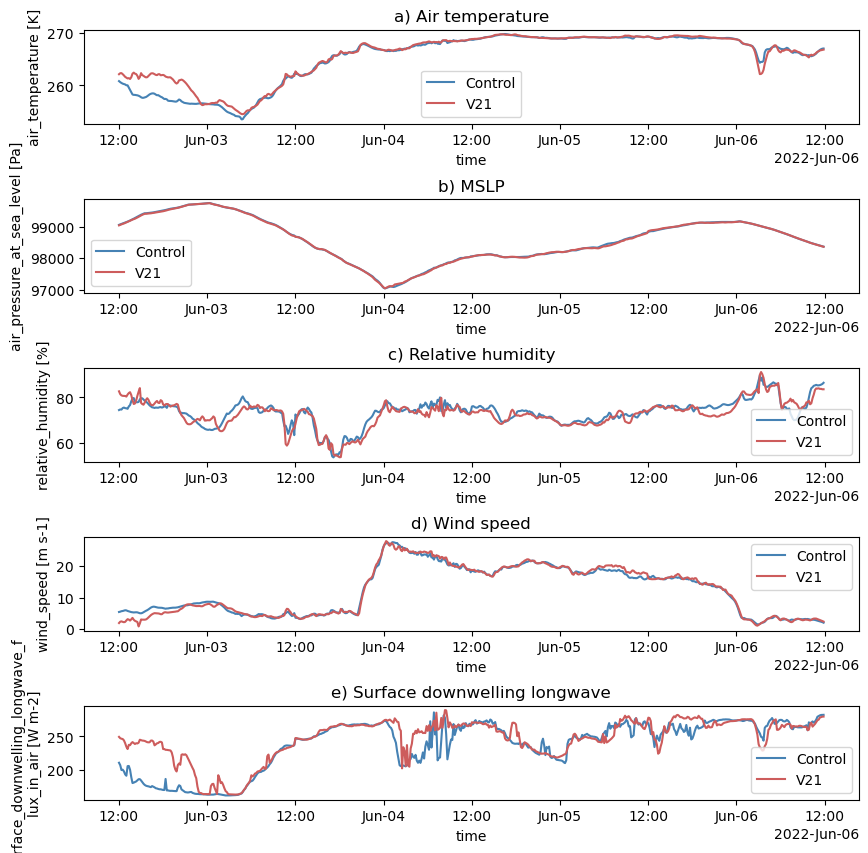

In [4]:
fig = plt.figure(figsize=(10,10))

ax = plt.subplot(511)
met.sel(run='Control')['air_temperature'].plot(label='Control',color='steelblue')
met.sel(run='V21')['air_temperature'].plot(label='V21',color='indianred')
plt.legend()
plt.title('a) Air temperature');

ax = plt.subplot(512)
met.sel(run='Control')['air_pressure_at_sea_level'].plot(label='Control',color='steelblue')
met.sel(run='V21')['air_pressure_at_sea_level'].plot(label='V21',color='indianred')
plt.legend()
plt.title('b) MSLP');

ax = plt.subplot(513)
met.sel(run='Control')['relative_humidity'].plot(label='Control',color='steelblue')
met.sel(run='V21')['relative_humidity'].plot(label='V21',color='indianred')
plt.legend()
plt.title('c) Relative humidity');

ax = plt.subplot(514)
met.sel(run='Control')['wind_speed'].plot(label='Control',color='steelblue')
met.sel(run='V21')['wind_speed'].plot(label='V21',color='indianred')
plt.legend()
plt.title('d) Wind speed');

ax = plt.subplot(515)
met.sel(run='Control')['surface_downwelling_longwave_flux_in_air'].plot(label='Control',color='steelblue')
met.sel(run='V21')['surface_downwelling_longwave_flux_in_air'].plot(label='V21',color='indianred')
plt.legend()
plt.title('e) Surface downwelling longwave');

plt.subplots_adjust(hspace=0.8)

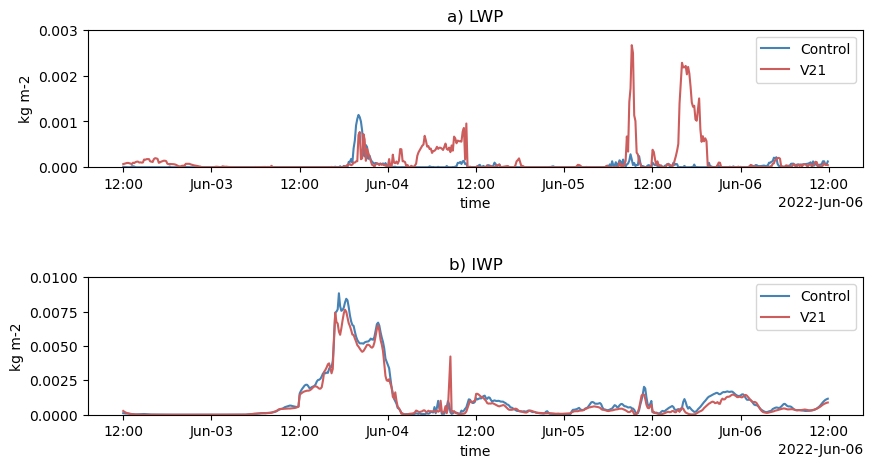

In [5]:
LWP = mmrs['mass_fraction_of_cloud_liquid_water_in_air'].sum('model_level_number') + mmrs['mass_fraction_of_rain_in_air'].sum('model_level_number')
IWP = mmrs['mass_fraction_of_cloud_ice_crystals_in_air'].sum('model_level_number') + mmrs['mass_fraction_of_cloud_ice_in_air'].sum('model_level_number') + mmrs['mass_fraction_of_graupel_in_air'].sum('model_level_number')

fig = plt.figure(figsize=(10,5))

ax = plt.subplot(211)
LWP.sel(run='Control').plot(label='Control',color='steelblue')
LWP.sel(run='V21').plot(label='V21',color='indianred')
plt.legend()
plt.title('a) LWP');
plt.ylabel('kg m-2')
plt.ylim(0,0.003)

ax = plt.subplot(212)
IWP.sel(run='Control').plot(label='Control',color='steelblue')
IWP.sel(run='V21').plot(label='V21',color='indianred')
plt.legend()
plt.title('b) IWP');
plt.ylabel('kg m-2')
plt.ylim(0,0.01)

plt.subplots_adjust(hspace=0.8)

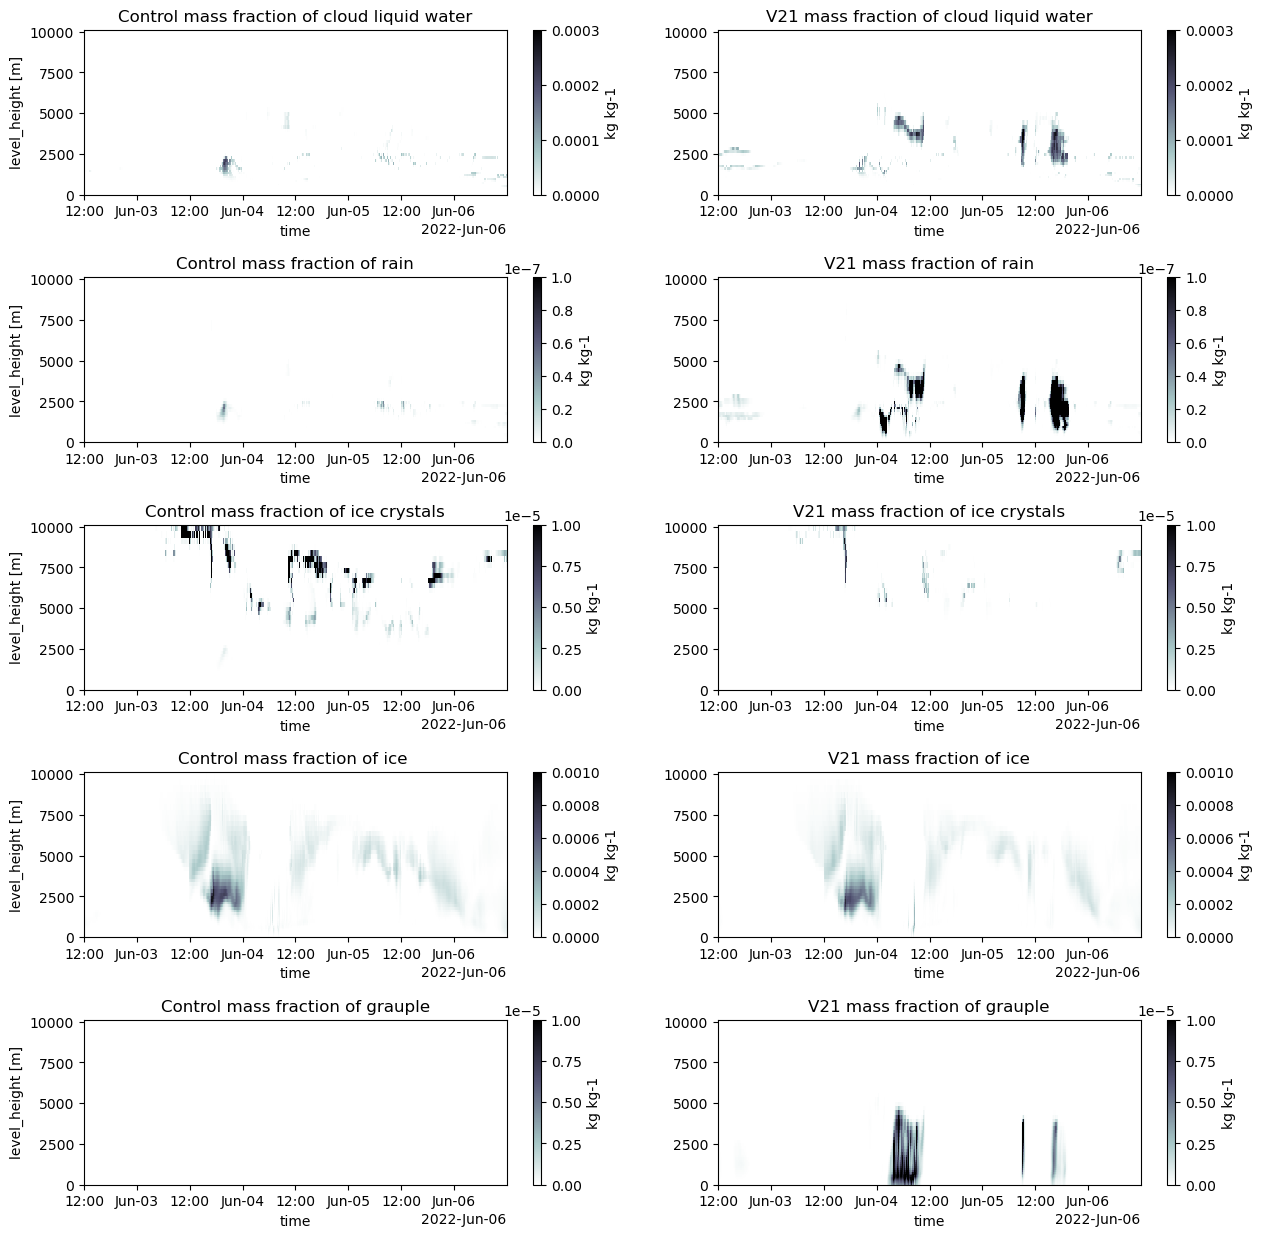

In [6]:
fig = plt.figure(figsize=(15,15))

ax = plt.subplot(521)
p = mmrs.sel(run='Control')['mass_fraction_of_cloud_liquid_water_in_air'].T.plot(cmap='bone_r',
                    vmin=0,vmax=3e-4,add_colorbar=False)
plt.title('Control mass fraction of cloud liquid water')
plt.colorbar(p,label=mmrs.sel(run='Control')['mass_fraction_of_cloud_liquid_water_in_air'].attrs['units'])

ax = plt.subplot(523)
p = mmrs.sel(run='Control')['mass_fraction_of_rain_in_air'].T.plot(cmap='bone_r',
                    vmin=0,vmax=1e-7,add_colorbar=False)
plt.title('Control mass fraction of rain')
plt.colorbar(p,label=mmrs.sel(run='Control')['mass_fraction_of_rain_in_air'].attrs['units'])

ax = plt.subplot(525)
p = mmrs.sel(run='Control')['mass_fraction_of_cloud_ice_crystals_in_air'].T.plot(cmap='bone_r',
                    vmin=0,vmax=1e-5,add_colorbar=False)
plt.title('Control mass fraction of ice crystals')
plt.colorbar(p,label=mmrs.sel(run='Control')['mass_fraction_of_cloud_ice_crystals_in_air'].attrs['units'])

ax = plt.subplot(527)
p = mmrs.sel(run='Control')['mass_fraction_of_cloud_ice_in_air'].T.plot(cmap='bone_r',
                     vmin=0,vmax=1e-3,add_colorbar=False)
plt.title('Control mass fraction of ice ')
plt.colorbar(p,label=mmrs.sel(run='Control')['mass_fraction_of_cloud_ice_in_air'].attrs['units'])

ax = plt.subplot(529)
p = mmrs.sel(run='Control')['mass_fraction_of_graupel_in_air'].T.plot(cmap='bone_r',
                     vmin=0,vmax=1e-5,add_colorbar=False)
plt.title('Control mass fraction of grauple')
plt.colorbar(p,label=mmrs.sel(run='Control')['mass_fraction_of_graupel_in_air'].attrs['units'])

#***************************************

ax = plt.subplot(522)
p = mmrs.sel(run='V21')['mass_fraction_of_cloud_liquid_water_in_air'].T.plot(cmap='bone_r',
                    vmin=0,vmax=3e-4,add_colorbar=False)
plt.title('V21 mass fraction of cloud liquid water')
plt.colorbar(p,label=mmrs.sel(run='V21')['mass_fraction_of_cloud_liquid_water_in_air'].attrs['units'])
plt.ylabel(' ')

ax = plt.subplot(524)
p = mmrs.sel(run='V21')['mass_fraction_of_rain_in_air'].T.plot(cmap='bone_r',
                    vmin=0,vmax=1e-7,add_colorbar=False)
plt.title('V21 mass fraction of rain')
plt.colorbar(p,label=mmrs.sel(run='V21')['mass_fraction_of_rain_in_air'].attrs['units'])
plt.ylabel(' ')

ax = plt.subplot(526)
p = mmrs.sel(run='V21')['mass_fraction_of_cloud_ice_crystals_in_air'].T.plot(cmap='bone_r',
                    vmin=0,vmax=1e-5,add_colorbar=False)
plt.title('V21 mass fraction of ice crystals')
plt.colorbar(p,label=mmrs.sel(run='V21')['mass_fraction_of_cloud_ice_crystals_in_air'].attrs['units'])
plt.ylabel(' ')

ax = plt.subplot(528)
p = mmrs.sel(run='V21')['mass_fraction_of_cloud_ice_in_air'].T.plot(cmap='bone_r',
                    vmin=0,vmax=1e-3,add_colorbar=False)
plt.title('V21 mass fraction of ice')
plt.colorbar(p,label=mmrs.sel(run='V21')['mass_fraction_of_cloud_ice_in_air'].attrs['units'])
plt.ylabel(' ')

ax = plt.subplot(5,2,10)
p = mmrs.sel(run='V21')['mass_fraction_of_graupel_in_air'].T.plot(cmap='bone_r',
                    vmin=0,vmax=1e-5,add_colorbar=False)
plt.title('V21 mass fraction of grauple')
plt.colorbar(p,label=mmrs.sel(run='V21')['mass_fraction_of_graupel_in_air'].attrs['units'])
plt.ylabel(' ')

plt.subplots_adjust(hspace=0.5)

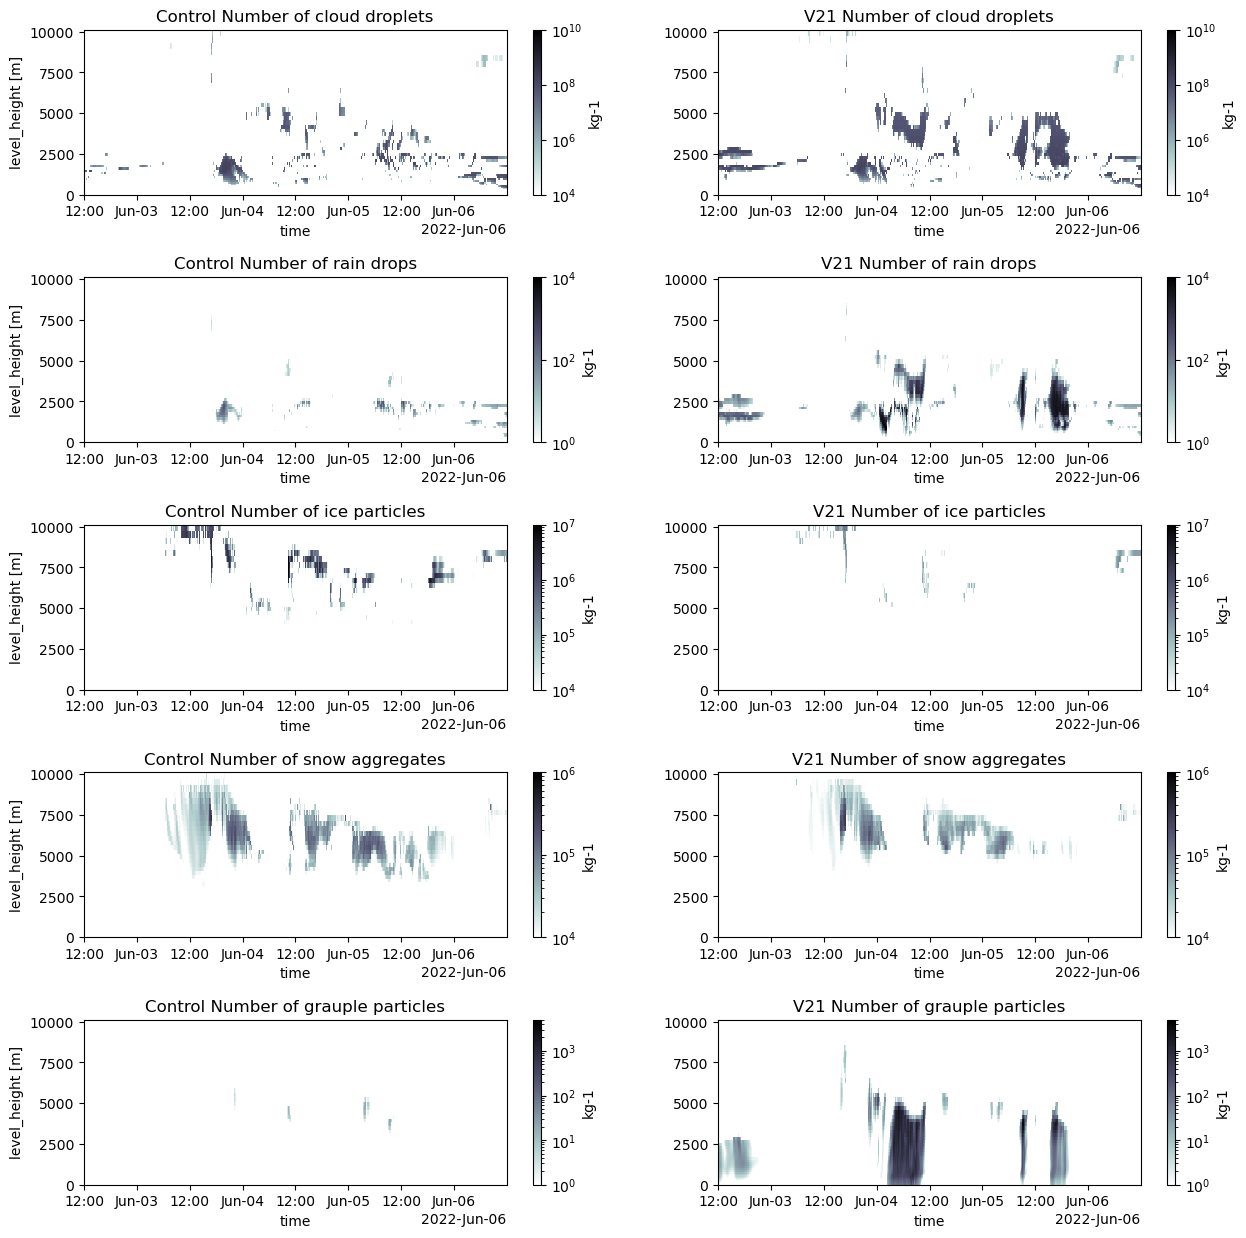

In [7]:
fig = plt.figure(figsize=(15,15))

ax = plt.subplot(521)
p = mmrs.sel(run='Control')['number_of_cloud_droplets_per_kg_of_air'].T.plot(cmap='bone_r',
                    norm=colors.LogNorm(),vmin=1e4,vmax=1e10,add_colorbar=False)
plt.title('Control Number of cloud droplets')
plt.colorbar(p,label=mmrs.sel(run='Control')['number_of_cloud_droplets_per_kg_of_air'].attrs['units'])

ax = plt.subplot(523)
p = mmrs.sel(run='Control')['number_of_rain_drops_per_kg_of_air'].T.plot(cmap='bone_r',
                    norm=colors.LogNorm(),vmin=1,vmax=10000,add_colorbar=False)
plt.title('Control Number of rain drops')
plt.colorbar(p,label=mmrs.sel(run='Control')['number_of_rain_drops_per_kg_of_air'].attrs['units'])

ax = plt.subplot(525)
p = mmrs.sel(run='Control')['number_of_ice_particles_per_kg_of_air'].T.plot(cmap='bone_r',
                    norm=colors.LogNorm(),vmin=1e4,vmax=1e7,add_colorbar=False)
plt.title('Control Number of ice particles')
plt.colorbar(p,label=mmrs.sel(run='Control')['number_of_ice_particles_per_kg_of_air'].attrs['units'])

ax = plt.subplot(527)
p = mmrs.sel(run='Control')['number_of_snow_aggregates_per_kg_of_air'].T.plot(cmap='bone_r',
                    norm=colors.LogNorm(),vmin=1e4,vmax=1e6,add_colorbar=False)
plt.title('Control Number of snow aggregates')
plt.colorbar(p,label=mmrs.sel(run='Control')['number_of_snow_aggregates_per_kg_of_air'].attrs['units'])

ax = plt.subplot(529)
p = mmrs.sel(run='Control')['number_of_graupel_particles_per_kg_of_air'].T.plot(cmap='bone_r',
                    norm=colors.LogNorm(),vmin=1,vmax=5000,add_colorbar=False)
plt.title('Control Number of grauple particles')
plt.colorbar(p,label=mmrs.sel(run='Control')['number_of_graupel_particles_per_kg_of_air'].attrs['units'])

#***************************************

ax = plt.subplot(522)
p = mmrs.sel(run='V21')['number_of_cloud_droplets_per_kg_of_air'].T.plot(cmap='bone_r',
                    norm=colors.LogNorm(),vmin=1e4,vmax=1e10,add_colorbar=False)
plt.title('V21 Number of cloud droplets')
plt.colorbar(p,label=mmrs.sel(run='V21')['number_of_cloud_droplets_per_kg_of_air'].attrs['units'])
plt.ylabel(' ')

ax = plt.subplot(524)
p = mmrs.sel(run='V21')['number_of_rain_drops_per_kg_of_air'].T.plot(cmap='bone_r',
                    norm=colors.LogNorm(),vmin=1,vmax=10000,add_colorbar=False)
plt.title('V21 Number of rain drops')
plt.colorbar(p,label=mmrs.sel(run='V21')['number_of_rain_drops_per_kg_of_air'].attrs['units'])
plt.ylabel(' ')

ax = plt.subplot(526)
p = mmrs.sel(run='V21')['number_of_ice_particles_per_kg_of_air'].T.plot(cmap='bone_r',
                    norm=colors.LogNorm(),vmin=1e4,vmax=1e7,add_colorbar=False)
plt.title('V21 Number of ice particles')
plt.colorbar(p,label=mmrs.sel(run='V21')['number_of_ice_particles_per_kg_of_air'].attrs['units'])
plt.ylabel(' ')

ax = plt.subplot(528)
p = mmrs.sel(run='V21')['number_of_snow_aggregates_per_kg_of_air'].T.plot(cmap='bone_r',
                    norm=colors.LogNorm(),vmin=1e4,vmax=1e6,add_colorbar=False)
plt.title('V21 Number of snow aggregates')
plt.colorbar(p,label=mmrs.sel(run='V21')['number_of_snow_aggregates_per_kg_of_air'].attrs['units'])
plt.ylabel(' ')

ax = plt.subplot(5,2,10)
p = mmrs.sel(run='V21')['number_of_graupel_particles_per_kg_of_air'].T.plot(cmap='bone_r',
                    norm=colors.LogNorm(),vmin=1,vmax=5000,add_colorbar=False)
plt.title('V21 Number of grauple particles')
plt.colorbar(p,label=mmrs.sel(run='V21')['number_of_graupel_particles_per_kg_of_air'].attrs['units'])
plt.ylabel(' ')

plt.subplots_adjust(hspace=0.5)

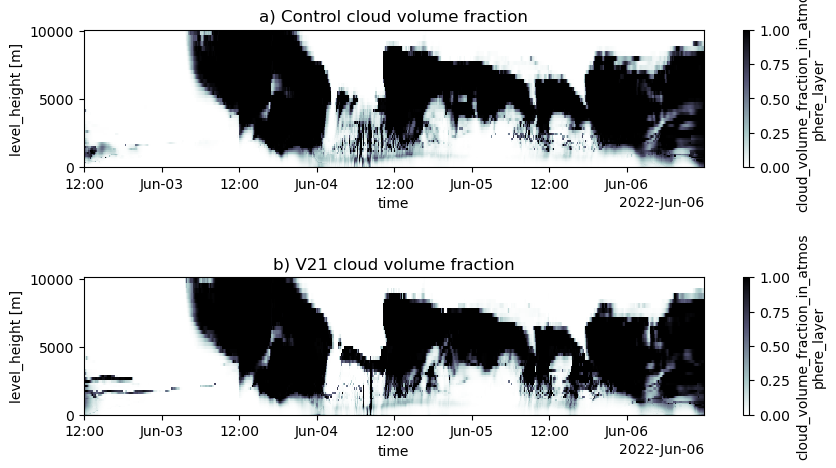

In [8]:
fig = plt.figure(figsize=(10,5))

ax = plt.subplot(211)
met_w_h.sel(run='Control')['cloud_volume_fraction_in_atmosphere_layer'].T.plot(label='Control',cmap='bone_r')
plt.title('a) Control cloud volume fraction');

ax = plt.subplot(212)
met_w_h.sel(run='V21')['cloud_volume_fraction_in_atmosphere_layer'].T.plot(label='Control',cmap='bone_r')
plt.title('b) V21 cloud volume fraction');

plt.subplots_adjust(hspace=0.8)

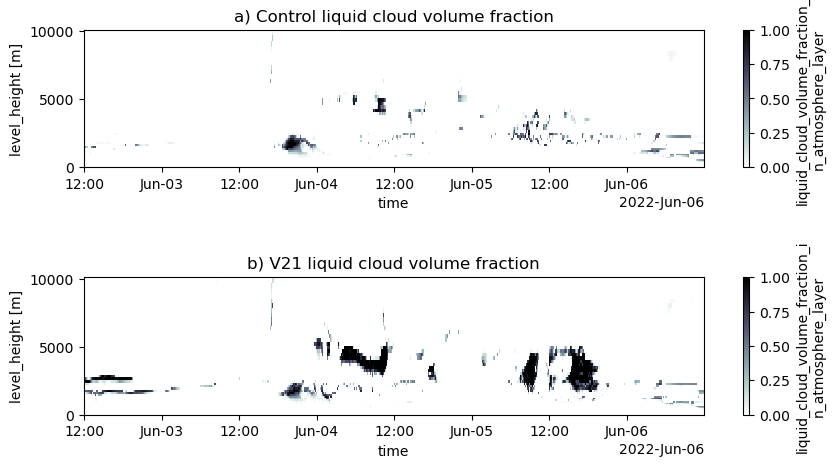

In [9]:
fig = plt.figure(figsize=(10,5))

ax = plt.subplot(211)
met_w_h.sel(run='Control')['liquid_cloud_volume_fraction_in_atmosphere_layer'].T.plot(label='Control',cmap='bone_r')
plt.title('a) Control liquid cloud volume fraction');

ax = plt.subplot(212)
met_w_h.sel(run='V21')['liquid_cloud_volume_fraction_in_atmosphere_layer'].T.plot(label='Control',cmap='bone_r')
plt.title('b) V21 liquid cloud volume fraction');

plt.subplots_adjust(hspace=0.8)

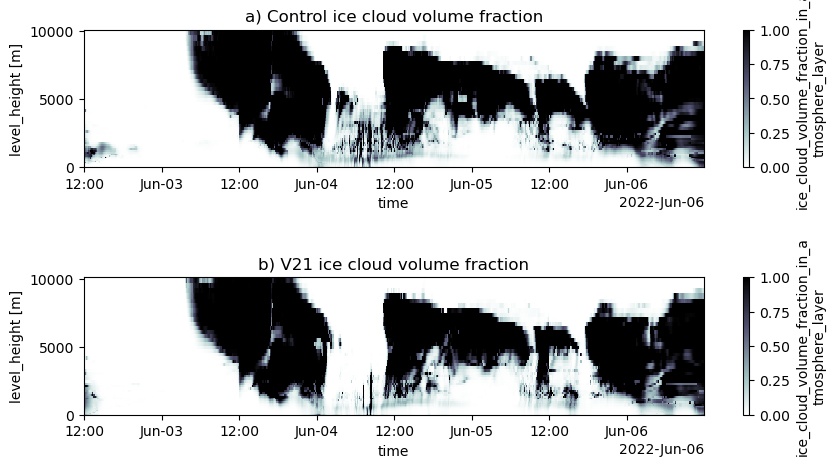

In [10]:
fig = plt.figure(figsize=(10,5))

ax = plt.subplot(211)
met_w_h.sel(run='Control')['ice_cloud_volume_fraction_in_atmosphere_layer'].T.plot(label='Control',cmap='bone_r')
plt.title('a) Control ice cloud volume fraction');

ax = plt.subplot(212)
met_w_h.sel(run='V21')['ice_cloud_volume_fraction_in_atmosphere_layer'].T.plot(label='Control',cmap='bone_r')
plt.title('b) V21 ice cloud volume fraction');

plt.subplots_adjust(hspace=0.8)